In [17]:
from sklearn.metrics import root_mean_squared_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import joblib

In [ ]:
df = pd.read_csv('cleaned_nifty_ds.csv')
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Cr Rs)
0,2024-08-12,24320.05,24472.80,24212.10,24347.00,279925100,30311.85
1,2024-08-13,24342.35,24359.95,24116.50,24139.00,239727640,25459.58
2,2024-08-14,24184.40,24196.50,24099.70,24143.75,303254705,27834.61
3,2024-08-16,24334.85,24563.90,24204.50,24541.15,271611087,28521.90
4,2024-08-19,24636.35,24638.80,24522.95,24572.65,243645503,22124.41


In [19]:
X = df.drop(['Close', 'Shares Traded', 'Turnover (Cr Rs)'], axis=1)
y = df['Close']

X = X.drop('Date', axis=1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (199, 3)
X_test shape: (50, 3)
y_train shape: (199,)
y_test shape: (50,)


In [21]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [22]:
lr_model = LinearRegression()
lr_model.fit(x_train_scaled, y_train)
lr_y_pred = lr_model.predict(x_test_scaled)

lr_rmse = root_mean_squared_error(y_test, lr_y_pred)
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)

print(f"Root Mean Squared Error: {lr_rmse}")
print(f'Mean Squared Error: {round(lr_mse,2)}')
print(f'R-squared: {round(lr_r2, 2)*100 }%')

Root Mean Squared Error: 69.33725780813583
Mean Squared Error: 4807.66
R-squared: 99.0%


In [23]:
joblib.dump(lr_model, 'linear_regression_model.joblib')

['linear_regression_model.joblib']

In [24]:
loaded_linear_model = joblib.load('linear_regression_model.joblib')

np.set_printoptions(suppress=True)

print("--- Model Predictions ---")
predictions = loaded_linear_model.predict(x_test_scaled)
print(np.round(predictions, 2))
print()

print("--- Actual Values ---")
print(np.round(y_test.values, 2))
print()

print("--- Prediction Errors ---")
print(np.round(predictions - y_test.values, 2))

--- Model Predictions ---
[22609.51 24744.78 23740.22 24425.53 23065.76 24365.57 24773.34 24134.32
 24993.03 23424.01 24622.83 25151.33 24600.53 24761.23 23401.15 25374.59
 24853.09 25244.36 22948.97 25370.9  24576.31 24877.52 23223.1  23700.84
 24307.47 24993.75 24425.49 25014.03 25957.84 23452.95 24607.08 26179.41
 22106.63 23380.81 25372.45 23075.2  24921.7  24844.5  24282.09 23520.15
 23278.46 23592.79 23301.02 24856.52 24742.55 25184.8  25036.18 23323.48
 24163.62 24822.49]

--- Actual Values ---
[22547.55 24770.2  23742.9  24484.05 23155.35 24379.6  24752.45 24008.
 25010.6  23431.5  24716.6  25044.35 24620.2  24680.9  23453.8  25461.
 24853.15 25279.85 22904.45 25383.75 24574.2  24936.4  23092.2  23518.5
 24328.5  24971.3  24340.85 25017.75 25940.4  23482.15 24542.5  26178.95
 22119.3  23165.7  25418.55 23024.65 24852.15 24826.2  24246.7  23519.35
 23249.5  23644.8  23311.8  24924.7  24683.9  25198.7  25001.15 23349.9
 24328.95 24795.75]

--- Prediction Errors ---
[  61.96  -25.

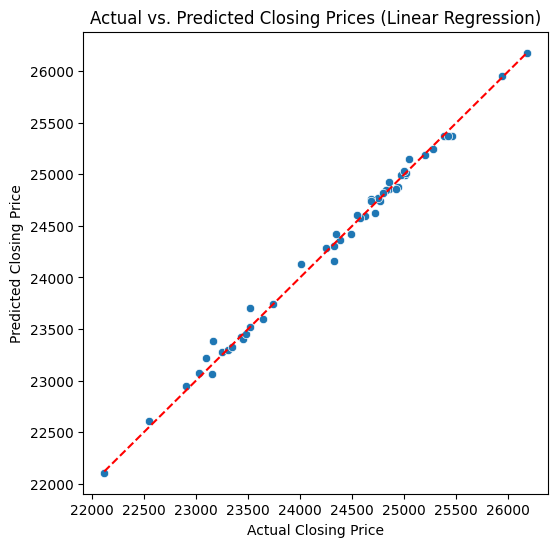

In [25]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test.values, y=predictions)
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Closing Price")
plt.ylabel("Predicted Closing Price")
plt.title("Actual vs. Predicted Closing Prices (Linear Regression)")
plt.show()

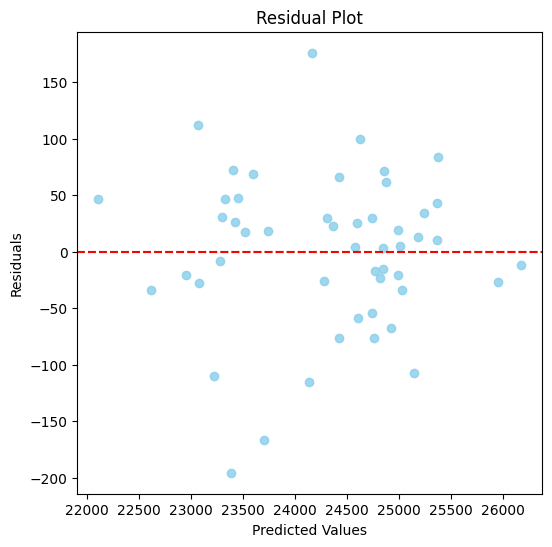

In [26]:
plt.figure(figsize=(6, 6))
sns.residplot(x=predictions, y=y_test.values, color='skyblue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

-----
 **MODEL PERFORMANCE ON DIFFERENT DATA PROCESSING & CONFIGURATIONS**

------
##### **TRIAL 1:**

**Dataset Used:**
* cleaned dataset (no preprocessing & no feature engineering applied),
* used standard scaler.
* *The linear model outperformed Random Forest.*

**Model's Performance:**

---- Linear Regression ----:
* Root Mean Squared Error: 70.21451114333215
* Mean Squared Error: 4930.08
* R-squared: 0.99

---- Random Forest Regressor ----:
* Root Mean Squared Error: 95.72347543915406
* Mean Squared Error: 9162.98375015033
* R-squared: 0.9885475665989905

-----------------------

##### **TRIAL 2:**

**Dataset Used:**
* cleaned & preprocessed dataset (no feature engineering applied),
* used standard scaler.
* *The linear model outperformed Random Forest but not as good as with unprocessed data*
* *So, log transformation isn't right preprocessing technique*

**Model's Performance:**

---- Linear Regression ----:
* Root Mean Squared Error: 70.7300053489991
* Mean Squared Error: 5002.73
* R-squared: 0.99

---- Random Forest Regressor ----:
* Root Mean Squared Error: 99.10910053653166
* Mean Squared Error: 9822.61380916034
* R-squared: 0.9877231223430468

-----------------------


##### **TRIAL 3:**

**Dataset Used:**
* cleaned & preprocessed dataset & feature engineering applied dataset,
* used standard scaler.
* *The linear model with unprocessed data works the best*

**Model's Performance:**

---- Linear Regression ----:
* Root Mean Squared Error: 164.60245941873052
* Mean Squared Error: 27093.97
* R-squared: 0.97

---- Random Forest Regressor ----:
* Root Mean Squared Error: 204.53475557305543
* Mean Squared Error: 41834.466237329536
* R-squared: 0.9477128355223878

-------------------------

##### **TRIAL 4:**

**Dataset Used:**
* cleaned dataset (no preprocessing & no feature engineering applied),
* used robust scaler instead of standard scaler.
* *The linear model stays as it is while Random Forest underperformed than with standard scaling.*

**Model's Performance:**

---- Linear Regression ----:
* Root Mean Squared Error: 70.21451114333215
* Mean Squared Error: 4930.08
* R-squared: 0.99

---- Random Forest Regressor ----:
* Root Mean Squared Error: 98.69041135019415
* Mean Squared Error: 9739.797292470532
* R-squared: 0.9878266312728622

---------------------------

##### **TRIAL 5:**

**Dataset Used:**
* cleaned dataset (no preprocessing & no feature engineering applied)
* used standard scaler
* Dropped `Shares Traded` & `Turnover (Cr Rs)` attributes

---- Linear Regression ----:

**Model's Performance:**
* Root Mean Squared Error: 69.33725780813583
* R-squared: 99.0%

----------------------------

##### **RESULT SUMMARY:**

* RMSE of 69: This means that, on average, the model's predictions are off by only about ₹69 from the actual closing price. On comparing this to an average price of roughly ₹24,000, the error is approximately 0.3% of the value. That's an extremely small and impressive error.
* Model Achieved an accuracy of 99.4%
